In [10]:
#The geometric Brownian motion can be simulated using the following class.
# 有机会尝试一下Milstein method
import numpy as np

# 标准布朗运动
class ProcessGBM:

    def __init__(self, mu, sigma):
        self._mu = mu
        self._sigma = sigma

    def Simulate(self, T=1, dt=0.001, S0=1.):
        n = round(T / dt)
        
        mu = self._mu
        sigma = self._sigma

        gaussian_increments = np.random.normal(size=n - 1)
        res = np.zeros(n)
        res[0] = S0
        S = S0
        sqrt_dt = dt ** 0.5
        for i in range(n - 1):
            S = S + S * mu * dt + sigma * \
                S * gaussian_increments[i] * sqrt_dt
            res[i + 1] = S

        return res

# CEV process
class ProcessCEV:

    def __init__(self, mu, sigma, gamma):
        self._mu = mu
        self._sigma = sigma
        self._gamma = gamma

    def Simulate(self, T=1, dt=0.001, S0=1.):
        n = round(T / dt)
        
        mu = self._mu
        sigma = self._sigma
        gamma = self._gamma

        gaussian_increments = np.random.normal(size=n - 1)
        res = np.zeros(n)
        res[0] = S0
        S = S0
        sqrt_dt = dt ** 0.5
        for i in range(n - 1):
            S = S + S * mu * dt + sigma * \
                (S ** gamma) * gaussian_increments[i] * sqrt_dt
            res[i + 1] = S

        return res

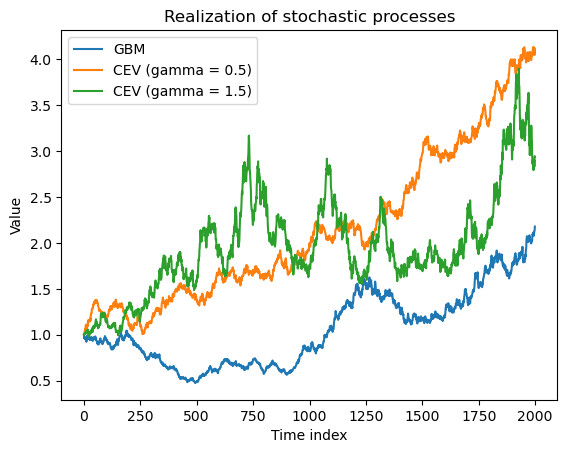

In [14]:
import matplotlib.pyplot as plt

# from ProcessGBM import ProcessGBM
# from ProcessCEV import ProcessCEV

T = 20
dt = 0.01
plt.plot(ProcessGBM(0.05, 0.15).Simulate(T, dt), label="GBM")
plt.plot(ProcessCEV(0.05, 0.15, 0.5).Simulate(
    T, dt), label="CEV (gamma = 0.5)")
plt.plot(ProcessCEV(0.05, 0.15, 1.5).Simulate(
    T, dt), label="CEV (gamma = 1.5)")

plt.xlabel('Time index')
plt.ylabel('Value')

plt.title("Realization of stochastic processes")

plt.legend()

plt.show()

In [ ]:
# 代码来自于wikipedia
# -*- coding: utf-8 -*-
# Milstein Method

import numpy as np
import matplotlib.pyplot as plt


class Model:
    """Stochastic model constants."""
    μ = 3
    σ = 1


def dW(Δt):
    """Random sample normal distribution."""
    return np.random.normal(loc=0.0, scale=np.sqrt(Δt))


def run_simulation():
    """ Return the result of one full simulation."""
    # One second and thousand grid points
    T_INIT = 0
    T_END = 1
    N = 1000 # Compute 1000 grid points
    DT = float(T_END - T_INIT) / N
    TS = np.arange(T_INIT, T_END + DT, DT)

    Y_INIT = 1

    # Vectors to fill
    ys = np.zeros(N + 1)
    ys[0] = Y_INIT
    for i in range(1, TS.size):
        t = (i - 1) * DT
        y = ys[i - 1]
        dw = dW(DT)

        # Sum up terms as in the Milstein method
        ys[i] = y + \
            Model.μ * y * DT + \
            Model.σ * y * dw + \
            (Model.σ**2 / 2) * y * (dw**2 - DT)

    return TS, ys


def plot_simulations(num_sims: int):
    """Plot several simulations in one image."""
    for _ in range(num_sims):
        plt.plot(*run_simulation())

    plt.xlabel("time (s)")
    plt.ylabel("y")
    plt.grid()
    plt.show()


if __name__ == "__main__":
    NUM_SIMS = 2
    plot_simulations(NUM_SIMS)

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt


class Model:
    """Stochastic model constants."""
    THETA = 0.7
    MU = 1.5
    SIGMA = 0.06


def mu(y: float, _t: float) -> float:
    """Implement the Ornstein–Uhlenbeck mu."""
    return Model.THETA * (Model.MU - y)


def sigma(_y: float, _t: float) -> float:
    """Implement the Ornstein–Uhlenbeck sigma."""
    return Model.SIGMA


def dW(delta_t: float) -> float:
    """Sample a random number at each call."""
    return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))


def run_simulation():
    """ Return the result of one full simulation."""
    T_INIT = 3
    T_END = 7
    N = 1000  # Compute at 1000 grid points
    DT = float(T_END - T_INIT) / N
    TS = np.arange(T_INIT, T_END + DT, DT)
    assert TS.size == N + 1

    Y_INIT = 0

    ys = np.zeros(TS.size)
    ys[0] = Y_INIT
    for i in range(1, TS.size):
        t = T_INIT + (i - 1) * DT
        y = ys[i - 1]
        ys[i] = y + mu(y, t) * DT + sigma(y, t) * dW(DT)

    return TS, ys


def plot_simulations(num_sims: int):
    """ Plot several simulations in one image."""
    for _ in range(num_sims):
        plt.plot(*run_simulation())

    plt.xlabel("time")
    plt.ylabel("y")
    plt.show()


if __name__ == "__main__":
    NUM_SIMS = 5
    plot_simulations(NUM_SIMS)